In [1]:
from IPython.display import display

# LCPB 21-22 Exercise 5, Data Visualization and Clustering

## Group 2221: Alessandro Maria Capodaglio, Sarvenaz Babakhani, Reza Rajaee, Elham Khosravi

#### For clarity the final results are detailed in this notebook, whereas the final code is available in the other uploaded files. 

### 1. The role of dimensions
#### By adding dimensions with noisy inputs, study the result of t-SNE and clustering with DBSCAN. <br>
In all cases perplexity equal to 20 was the best visualisation. Perplexity will be addressed in the next question, however its interesting to see that t-SNE is virtually immune to increases in the number of dimensions. <br>
Regarding DBSCAN, initially ε was chosen to be a multiple of the mean minimum distance between points. Just as a reminder: the  parameter ε defines the radius of neighborhood around a point. The parameter MinPts is the minimum number of neighbors within a radius of of the point for it to be considered a "core" point (https://www.datanovia.com/en/lessons/dbscan-density-based-clustering-essentials/).
As the number of dimensions increases the optimal choice for ε tends to become bigger, despite the mean minimum distance between points is decreasing. This also becomes true for the minPts parameter, increasing the minPts parameter doesn't lead to better performance, indeed a good value for minPts is 3 for all dataset dimensionalities.( see notebook **t-SNE_and_DBSCAN_different_dimension.ipynb**).

#### D=3
![alt](tsne3.png)
#### D=4
![alt](tsne4.png)
#### D=5
![alt](tsne5.png) 
#### D=6
![alt](tsne6.png)
#### D=8
![alt](tsne8.png)
#### D=12
![alt](tsne12.png)
#### D=15
![alt](tsne15.png)

#### D=3
![alt](result3.png)
#### D=4
![alt](result4.png)
#### D=5
![alt](result5.png) 
#### D=6
![alt](result6.png)
#### D=8
![alt](result8.png)
#### D=12
![alt](result12.png)
#### D=15
![alt](result15.png)

## 2. The role of *perplexity* in t-SNE

### Provide your explanation on the patterns observed by varying the perplexity of t-SNE.
Before delving into the results, in order to develop an understanding about perplexity some background on t-SNE needs to be given. The part in italics is a brief introduction on t-SNE, comments on the perplexity are written in bold type face.


*The first step that t-SNE performs is to construct a probability distribution from the data in the original high dimensionality space. This probability distribution has large values when two points in this space are close to each other and small values when the points are far away.
After having constructed this probability distribution, t-SNE constructs a second long tailed probability distribution "of"/"in" the desidered embedded lower dimensional space (the one in which we want to visualize the data).*

*The embedding coordinates (thus the distribution) is chosen in order to minimize the Kullback-Leibler divergence between this new lower dimesionality distribution (i.e. the distribution constructed from points in the lower dimensionality space) and the original high dimensionality distribution (...).*

*The way the K-L divergence is minimized is usually through gradient descent (despite it being non-convex). When computing the gradient of the K-L divergence the terms which we obtain can be thought of as an attractive force, and a repulsive force. The attractive force is significative between points that are nearby in the original space (since it involves the pij term), whereas all pairs of points are repulsed from each other.*

**Perplexity factors into the $\mathbf{p_{i|j}}$ terms and, in a way, it sets the "actual" number of neighbors that each point is attracted to (more correctly is controls the importance to give to each neighbor). <br>
Loosely speaking if the perplexity is large then the more non-local information will be kept, i.e. more pairs of points will attract each other, so the individual clusters will have a tighter/denser shape.
If the perplexity is small then repulsive forces will dominate and then the embedding in lower dimensional space will become much more uniform, clusters will "blend into" one another.<br>
Note that this is somewhat opposite to a naive interpretation of the terms "attraction" and "repulsion".**

#### Before analyzing the results for various values of perplexity let us verify that the above statement (in bold face) makes sense. <br>The following cell shows the result of t-SNE for extreme values of perplexity. 

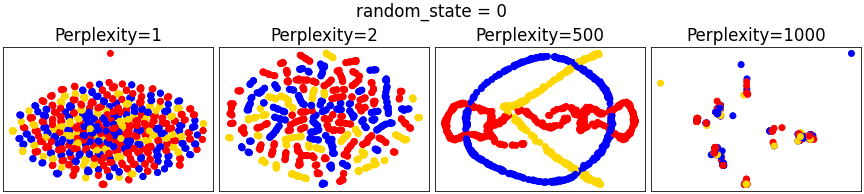

In [1]:
from IPython import display
display.Image(filename = '5to25_perplexity1-2-500-1000_0.png')

#### All the cells below show the results of t-SNE when supplied with different values of perplexity. Note that the initial random state was also represented, different initializations of this parameter give rise to very mildly different 2D embeddings. Reported values were kept in the 5-50 range. Further reading on the topic can be found at the following:  https://distill.pub/2016/misread-tsne/

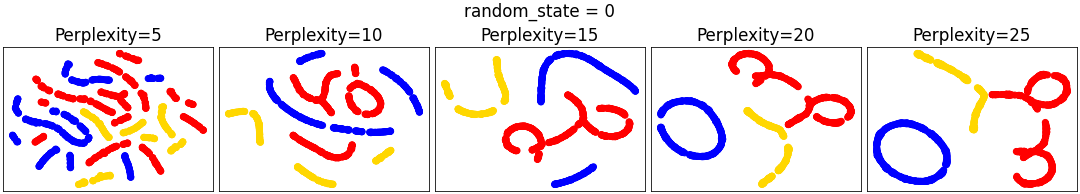

In [2]:
from IPython import display
display.Image(filename = '5to25_random_state0.png')

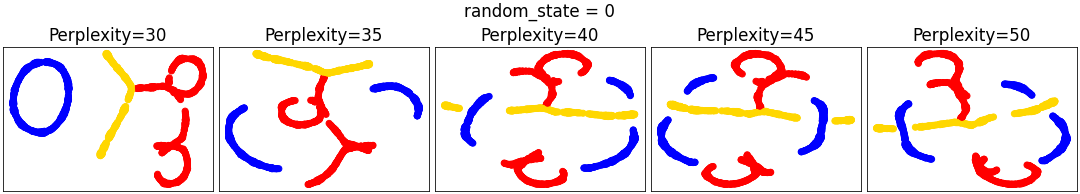

In [3]:
from IPython import display
display.Image(filename = '30to50_randomstate0.png')

### Do they vary if t-SNE is initialized by using principal component analysis (init = 'pca')?

The default initialization of t-SNE is "random", another possible option is to initialize the t-SNE algorithm with a principal component analysis. Further studies (**Kobak, Dmitry & Linderman, George. (2021). Initialization is critical for preserving global data structure in both t-SNE and UMAP. Nature Biotechnology. 39. 1-2. 10.1038/s41587-020-00809-z.**) seem to suggest that a pondered initialization is fundamental to preserve the global structure of the data.

Indeed a whole course could be devoted to t-SNE and other visualization options, such as UMAP (**U**niform **M**anifold **A**pproximation and **Projection**), an overview of the topic at hand can be found at https://towardsdatascience.com/why-umap-is-superior-over-tsne-faa039c28e99.

Also the sklearn documentation reports the following: "pca is usually more globally stable than random initialization". Indeed this was found to be the case, the cells below show the result of t-SNE for varying values of perplexity, using the PCA initialization. <br>
Note that the difference in the output for different values of perplexity is not as evident with this initialization. 

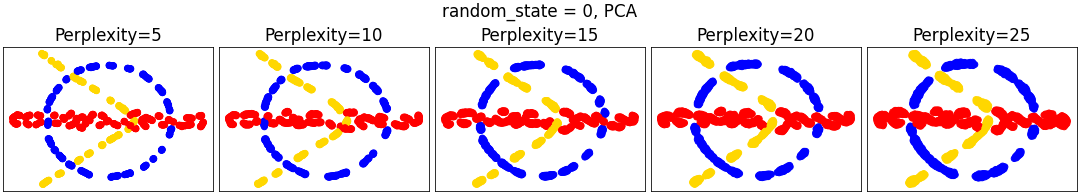

In [4]:
from IPython import display
display.Image(filename = '5to25_pca_random_state0.png')

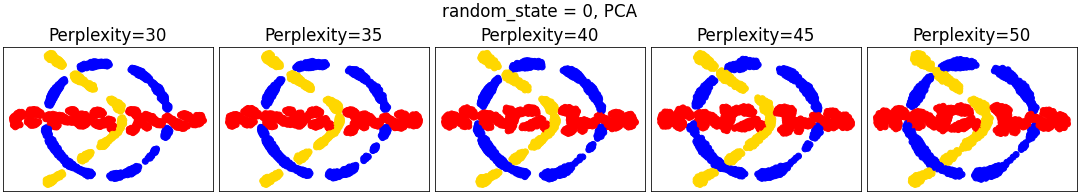

In [5]:
from IPython import display
display.Image(filename = '30to50_pca_random_state0.png')

### 3. Tuning of “eps” and “minPts” in DBSCAN algorithm for clustering

According to the provided review and several other resources ([Explaining DBSCAN](https://towardsdatascience.com/explaining-dbscan-clustering-18eaf5c83b31#:~:text=Epsilon%20and%20Minimum%20Points%20are,be%20inside%20the%20radius%20), [How to determine Epsilon and MinPts](http://sefidian.com/2020/12/18/how-to-determine-epsilon-and-minpts-parameters-of-dbscan-clustering/)) we should set minPts to be greater or equal to the number of dimensionality of our dataset,but after testing for some dimension we conclude that we should choose minPts equal to 3 as there is 3 main component (others are just noise),and for other datasets, can be determine by pca.

The value for ε can then be chosen by using a k-distance graph, plotting the distance to the k = minPts-1 nearest neighbor ordered from the largest to the smallest value. Good values of ε are where this plot shows an “elbow”.
we plot for different dimensions and choose  ε as one of the sharpest point in the plot. It could be chosen smaller but with this choice, the value of 1.5 * ε , most of the time give the nmi more than 94%(in **t-SNE_and_DBSCAN_1000N.ipynb**). if we increase the number of data (N=6000) the value of  ε give the nmi near 100% (in **t-SNE_and_DBSCAN_6000N.ipynb**). 

For each dataset we can define the proper value for minPts and ε,then by grid search, find the best solution which is best fit for nature of the dataset.


###  N=1000

#### D=3
![alt](eps_plot3_1000.png)
#### D=5
![alt](eps_plot5_1000.png)
#### D=7
![alt](eps_plot7_1000.png) 
#### D=10
![alt](eps_plot10_1000.png)

#### D=3
![alt](tsne3_1000.png)
#### D=5
![alt](tsne5_1000.png)
#### D=7
![alt](tsne7_1000.png) 
#### D=10
![alt](tsne10_1000.png)

#### D=3
![alt](result3_1000.png)
#### D=5
![alt](result5_1000.png)
#### D=7
![alt](result7_1000.png) 
#### D=10
![alt](result10_1000.png)

### N=6000

#### D=3
![alt](eps_plot3_6000.png)
#### D=5
![alt](eps_plot5_6000.png)
#### D=7
![alt](eps_plot7_6000.png) 
#### D=10
![alt](eps_plot10_6000.png)

#### D=3
![alt](tsne3_6000.png)
#### D=5
![alt](tsne5_6000.png)
#### D=7
![alt](tsne7_6000.png) 
#### D=10
![alt](tsne10_6000.png)


#### D=3
![alt](result3_6000.png)
#### D=5
![alt](result5_6000.png)
#### D=7
![alt](result7_6000.png) 
#### D=10
![alt](result10_6000.png)